In [1]:
import numpy as np #Importeer enkele nodige packages.
import math
from scipy.optimize import minimize, fsolve
import matplotlib.pyplot as plt


ValueError: Jacobian is required for Newton-CG method

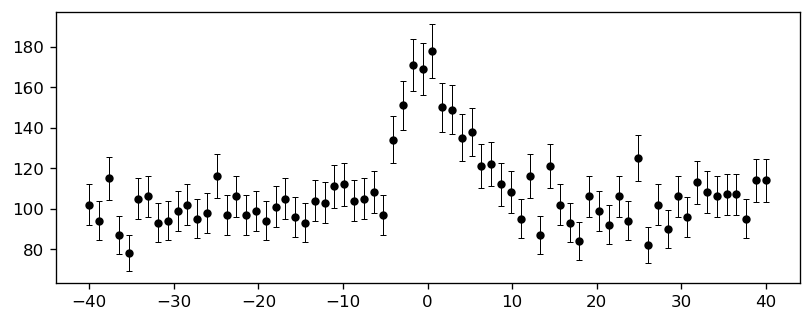

In [9]:
dataset = np.loadtxt("38.txt", delimiter=" ").T
x=dataset[0]
I=dataset[1]

_, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8, 3))
ax.errorbar(x, I, yerr=np.sqrt(I), label="dataset",marker="o", markersize=4, fmt=" ", color="black", ecolor="black", capsize=2, capthick=0.6, linewidth=0.6)

def intensity(x,gamma,y_0,A,x_0):
    I = A*gamma/(np.pi*((x-x_0)**2+gamma**2))+y_0
    return I

def LS_intensity(x):
    gamma,y_0,A,x_0=x
    LS=0
    for i in range(len(x)):
        LS+=I[i]*np.log(intensity(x[i],gamma,y_0,A,x_0))-intensity(x[i],gamma,y_0,A,x_0)
    return LS

opt = minimize(LS_intensity,(4.5,90,1200,0),method = 'Newton-CG',tol=1e-6)
print(opt)
x_dots = np.linspace(np.min(x),np.max(x),200)
ax.plot(x_dots, intensity(x_dots,opt.x[0],opt.x[1],opt.x[2],opt.x[3]), 'r', label="model")
ax.set_ylabel("$I$ [arb. eenh.]")
ax.set_xlabel("$x$ [mm]")
ax.legend()

plt.tight_layout() ; plt.show()